## **Credit** **Card Fraud Detection** 

### **Introduction**
A typical organization loses an estimated 5% of its yearly revenue to fraud. In this notebook, you will learn how to predict the Credit Card Fraud detection using data. 

About the data: The data we are going to use is the Kaggle Credit Card Fraud Detection dataset (https://www.kaggle.com/mlg-ulb/creditcardfraud). It contains features V1 to V28 which are the principal components obtained by PCA. We are going to neglect the time feature which is of no use to build the models. The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not.

#### **You will learn**
How to apply supervised learning algorithms to detect fraudulent behavior 
Logistic Regression

1. How to handle imbalance dataset
2. How to apply random sampling techniques
3. How to check the precision and Recall values
4. ROC curve
5. Ensample techniques such as Random Forest
6. Tune the Random Forest Parameters
7. How to use Gridsearch


In [ ]:
## Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
# Read the dataset
url='/content/drive/MyDrive/creditcard.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Drop the Time column
df=df.drop("Time",axis=1,inplace=False)

In [36]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

### **Data Visiualizations**

Plot the scatter plot for Fraud data and Non Fraud Data

In [47]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class: Non Fraud", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class: Fraud", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

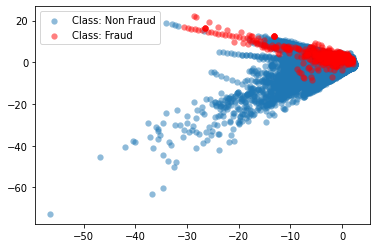

In [48]:

X=df.iloc[:,:-1].values
y=df['Class'].values
plot_data(X,y)

By visualizing the data, you can able to see how fraud cases are scattered over our data, and anyhow,we have few caes. 

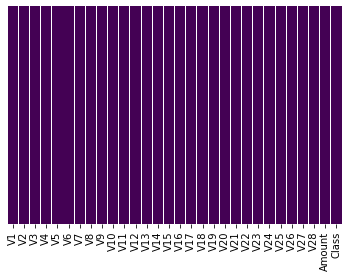

In [ ]:
#Check the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

By visualizing heatmap ,we can able to see, it is showing in our data has no null values

In [ ]:
# Check the class Uniques Values
print("Class uniques value are  "+ "\n"+str(df.Class.value_counts()))

Class uniques value are  
0    284315
1       492
Name: Class, dtype: int64


<Figure size 1440x1440 with 0 Axes>

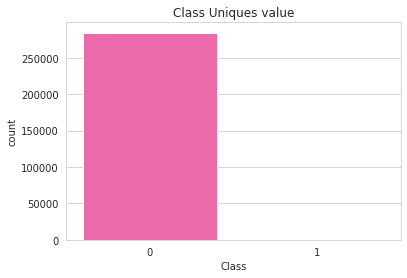

<Figure size 1440x1440 with 0 Axes>

In [49]:
#Visiualize the Non Fraud case vs Froud case using countplot
sns.set_style("whitegrid")
sns.countplot(df['Class'],data=df,palette='spring')
plt.title('Class Uniques value')
plt.figure(figsize=(20,20))
#A picture often makes the imbalance problem clear

Here, We are gonna predict whether credit card transactions fraud or not. So, our last column is the output or dependent column. But it seems not balanced with the Fraud case and Non-Fraud Case. So, we have to apply some sampling techniques to transfer the imbalance data set to balanced data set.

In [ ]:
# Check the fraud percentage 
non_fraud_case=df.Class.value_counts()[0]
fraud_case=df.Class.value_counts()[1]
fraud_case_per=(fraud_case/len(df.Class))*100
print("Non fraud transection is "+ " "+ str(non_fraud_case))
print("Fraud transection is "+ " "+ str(fraud_case))
print("Percentage of the fraud transection is "+ " "+ str(fraud_case_per))

Non fraud transection is  284315
Fraud transection is  492
Percentage of the fraud transection is  0.1727485630620034


### **Feature Scaling**

In our data set Amount feature has more variations. So, we should bring all feature to the same platform. Next, we will see how to apply Feature scaling techniques.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc = StandardScaler()
# amount = df['Amount'].values
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1, 1))

In [ ]:
# Split the data set into Trainn and validation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Class'],test_size =0.2,random_state=1)

### **Appling over sampling techniques to deal with imbalanced Fraud and Non Fraud case**

In [ ]:
#Import the over sampling module from the imblearn library
from imblearn.over_sampling import SMOTE

### **Applying Synthetic Minority Oversampling Technique (SMOTE)**
 For re-balance our data we ware going to apply Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS(Random over sampling), SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. Also in the real problem we have to apply the sampling techniques to only the trainig data set.
 

In [52]:
#Appling Resampling techniques only the train data set
method=SMOTE(kind='borderline1')
x_resample,y_resample=method.fit_sample(x_train,y_train)

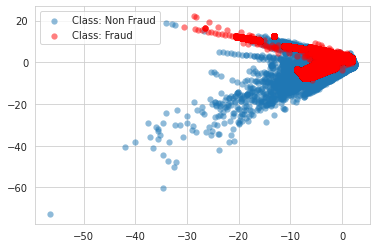

In [55]:
# Plot the resampled data
plot_data(x_resample, y_resample)

### **Logistic Regression Model**

In [56]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
log=LogisticRegression(solver='liblinear' )
model_log=log.fit(x_resample,y_resample)

Get the confiusion matrix

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import classification_report
log_predict=model_log.predict(x_test)
con_matrix_log = confusion_matrix(y_test, log_predict)
print(classification_report(y_test,log_predict))
print("accuracy of the train data set" + " "+ str(accuracy_score(y_train,model_log.predict(x_train))))
print("accuracy of the test data set" + " "+ str(accuracy_score(y_test,log_predict)))
print('Confusion matrix for Logistic Regression :\n',con_matrix_log)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56875
           1       0.12      0.82      0.22        87

    accuracy                           0.99     56962
   macro avg       0.56      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962

accuracy of the train data set 0.9904496477868726
accuracy of the test data set 0.9909237737438994
Confusion matrix for Logistic Regression :
 [[56374   501]
 [   16    71]]


**Precision Recall**

Credit card company wants to optimize for **recall**

Insurance company wants to optimize for **precision**

**Precision= True Positives/(True Positives + False Positives)**
 
*Fraction of actual fraud cases out of all predicted fraud cases*

*  true positives relative to the sum of true positives and false positives

**Recall= True Positives/( True Positives + False Negatives)**
 
*Fraction of predicted fraud cases out of all actual fraud cases*

*  true positives relative to the sum of true positives and false negative

*Precision and recall are typically inversely related*

*  As precision increases, recall falls and vice-versa


In [67]:
print("precision:"+" "+ str(con_matrix_log[0][0]/(con_matrix_log[0][0]+con_matrix_log[1][0])))
print("recall:"+" "+ str(con_matrix_log[0][0]/(con_matrix_log[0][0]+con_matrix_log[0][1])))

precision: 0.999716261748537
recall: 0.9911912087912088


In [64]:
print("precision 1:"+" "+ str(con_matrix_log[1][0]/(con_matrix_log[0][0]+con_matrix_log[1][0])))
print("recall 1:"+" "+ str(con_matrix_log[0][0]/(con_matrix_log[0][0]+con_matrix_log[0][1])))

0.9911912087912088

we are getting good accuracy around 99% But our intense not only the accuracy because our model hast to identify fraud transaction but here, we got false negative values as 501 out of 572 in Another way we can tell our model detected only 71 transections as Fraud out of 572 So, we have to consider true negative predicted values So, We are getting far fewer false positives. So, Let's now explore whether we can improve the prediction results even further with other algorithms like Random Forest.

Text(69.0, 0.5, 'Truth')

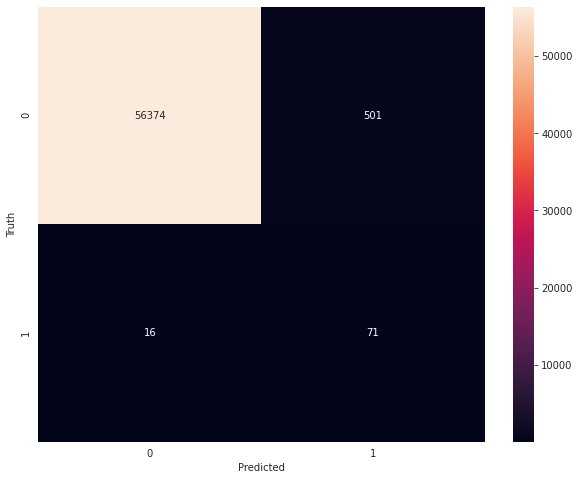

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix_log,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### **Random foreset Tecnhiques for Fraud detction**

**Random forest classifier**

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
rf=RandomForestClassifier(random_state=42,n_estimators=20,class_weight='balanced_subsample')
model_rf=rf.fit(x_resample,y_resample)
rf_predict=model_rf.predict(x_test)

In [ ]:
con_matrix_rf = confusion_matrix(y_test, rf_predict)
classification_report_rf=classification_report(y_test,rf_predict)
print("accuracy of the train data set" + " "+ str(accuracy_score(y_train,model_rf.predict(x_train))))
print("accuracy of the test data set" + " "+ str(accuracy_score(y_test,rf_predict)))
print(classification_report_rf)

accuracy of the train data set 0.9999912221027453
accuracy of the test data set 0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.92      0.77      0.84        87

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Now obtained more meaningful performance metrics that tell us how well the model performs. Our model has predicted as false negative values as 6 out of 73 in Another way we can tell our model detected 67 transections as Fraud out of 73. This is good, and as a result, you have a very high precision score. however, miss 18 cases of actual fraud. The recall is therefore not as good as precision. Anyhow we have to consider false negative values as much as possible So, we have to consider true negative predicted values. So, Let's now explore whether we can improve the prediction results even further with others tuning the Random Forest algorithm.

Text(69.0, 0.5, 'Truth')

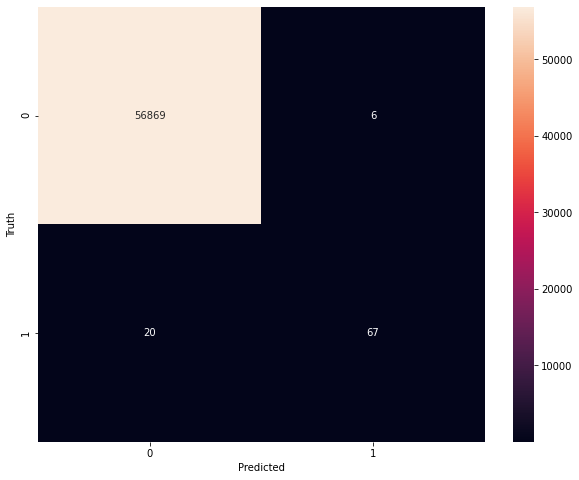

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(con_matrix_rf,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

RandomForest model is better than logistic regression model. it's more care about true negative false value or other hand it predectied true negative than logistic regression true negative. 

### Precision and Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve,average_precision_score,roc_auc_score
average_precision= average_precision_score(y_test,rf_predict)

print(average_precision)

0.7071689352318905


In [ ]:
precision, recall,thresholds = precision_recall_curve(y_test,rf_predict)
print("precision:"+ str(precision) + " \n"+"recall:"+str( recall)+"\n"+"thresholds:"+ str(thresholds))

precision:[0.00152733 0.91780822 1.        ] 
recall:[1.         0.77011494 0.        ]
thresholds:[0 1]


In [ ]:
# Predict probabilities
probs = model_rf.predict_proba(x_test)

print(roc_auc_score(y_test, probs[:,1]))

0.9359531135531135


### ***Plot the recall precision tradeoff***

In [ ]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='g', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

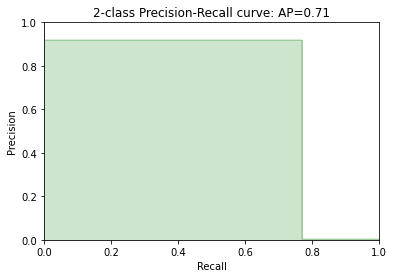

In [ ]:
# Plot the recall precision tradeoff
from sklearn.metrics import r2_score, roc_auc_score, roc_curve
plot_pr_curve(recall, precision, average_precision)

#### Random forest hyper Parameters

**Hyper parameters Tuning**

RandomForestClassifier(
  
                      bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### GridSearchCV for hyperparameter tuning

In [ ]:
def get_result(x_resample: np.ndarray,y_resample: np.ndarray,
               x_test: np.ndarray,y_test: np.ndarray,model_rf_cv):
  model_rf_cv.fit(x_resample,y_resample)
  predict_cv=model_rf_cv.predict(x_test)
  try:
    probs = model_rf_cv.predict_proba(x_test)
    print('ROC Score:')
    print(roc_auc_score(y_test, probs[:,1]))
  except AttributeError:
    pass
  print('\nClassification Report:')
  print(classification_report(y_test, predict_cv))
  print('\nConfusion Matrix:')
  print(confusion_matrix(y_test, predict_cv))

In [71]:
# Change the model options
model_rf_cv = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=42)

# Run the function get_model_results
get_result(x_resample, y_resample, x_test, y_test, model_rf_cv)

ROC Score:
0.9588430971327524

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.56      0.80      0.66        87

    accuracy                           1.00     56962
   macro avg       0.78      0.90      0.83     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56820    55]
 [   17    70]]


### Parameter optimization with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(x_resample,y_resample)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

###Model results with GridSearchCV

In [72]:
# # Input the optimal parameters in the model
model_results = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='entropy',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=42)

# Get results from your model
get_result(x_resample, y_resample, x_test, y_test, model_results)

ROC Score:
0.9677892130857648

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.28      0.82      0.42        87

    accuracy                           1.00     56962
   macro avg       0.64      0.91      0.71     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56694   181]
 [   16    71]]


### Conclusion
The model has been improved by hyper parameter tunning.So, we have to change the each hyper parameters until we are goona getting expected out put.
 However, you see that the number of false positives actually went up. That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately, this final decision should be made by you and the fraud team together.